In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from py_pcha import PCHA


In [3]:
try:
    base = Path(__file__).resolve().parent.parent
except NameError:
    base = Path.cwd().parent.parent  # if running interactively inside si_figures/

df_maxs = pd.read_csv(base / 'data' / 'df_maxs.csv',index_col='Unnamed: 0')


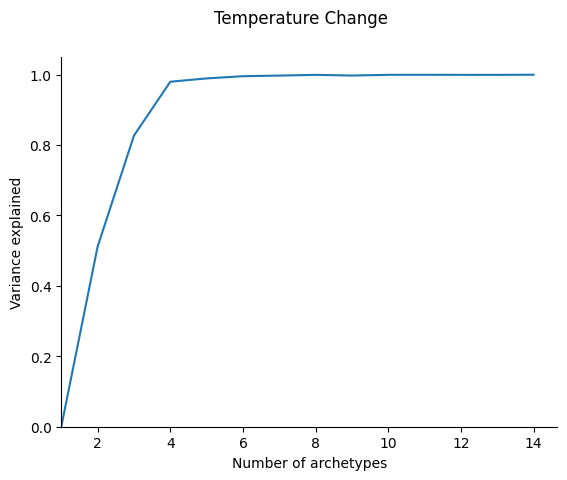

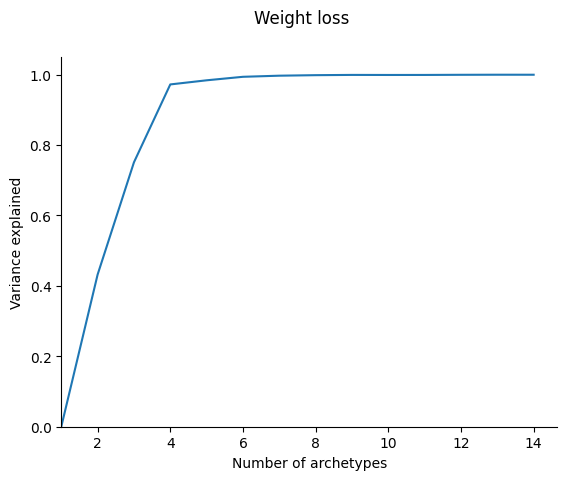

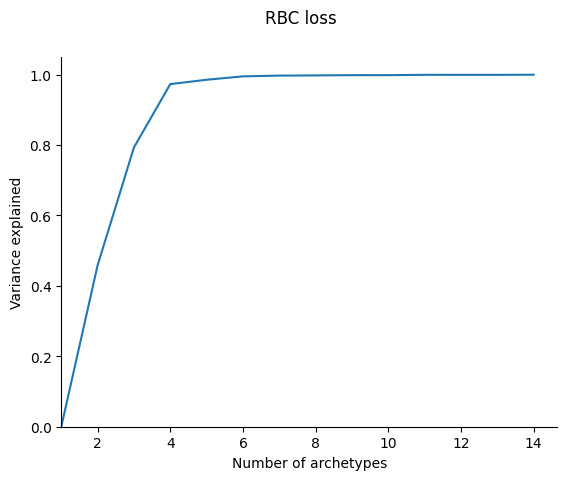

In [9]:
np.random.seed(7)
Ds = ['Temp','Weight','RBC']
D_labels = ['Temperature Change', 'Weight loss','RBC loss']
t_ratios_dict = {}
for D,D_label in zip(Ds,D_labels):
    varexpls = []
    max_nocs = 15
    for noc in range(1,max_nocs):
        damage_col_name = f'Max.{D}.Delta.zscore'
        MDI = np.array([df_maxs['Max.Parasitemia.zscore'],df_maxs[damage_col_name],df_maxs['Immune.Intensity.zscore']]).transpose()
        XC, S, C, SSE, varexpl = PCHA(MDI.transpose(), noc=noc, delta=0.1)
        varexpls.append(varexpl)
    fig,ax = plt.subplots()
    ax.plot(range(1,max_nocs),np.array(varexpls))
    ax.set_xlim(left = 1)
    ax.set_ylim(bottom = 0.0)
    ax.set_xlabel('Number of archetypes')
    ax.set_ylabel('Variance explained')
    fig.suptitle(f'{D_label}')
    ax.spines[['top','right']].set_visible(False)
    fig.savefig('variance_explained_for_num_archetypes.png',dpi = 600, bbox_inches = 'tight')
    fig.savefig('variance_explained_for_num_archetypes.pdf',dpi = 600, bbox_inches = 'tight')
    
    plt.show()